Individual Assignment - Mostafa Ibrahim 22010677


The learning outcomes

    This individual assignment involves working with the diabetes dataset and using machine learning algorithms, SVM model and an ensemble model to perform classification tasks and compare their performance. The main learning outcomes include comparing and contrasting the basic principles and characteristics of the machine learning algorithms and gaining hands-on experience with classification tasks.

Libraries
 
* Note: **I am using imblearn library to scale the data**

       - numPy: NumPy is an extremely popular library in Python used when working with numbers.

       - matplotlib: Matplotlib is the most popular library for visualisation with Pytho

       - Scikit-learn: provide the needed algorithms to complete the assignment 

          datasets: contains several standard datasets, used for experimentation and pracrice

          Pipeline: simplify the workflow and increase code readabilty 

          StandardScaler: standardizing features 

          polynomialFeatures: genrating polynomial features

          LinearSVC and SVC: building support vector machines 

In [207]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

Datasets

    Pandas: Pandas is a popular library for data analysis in Python

    The dataset is read into a pandas DataFrame and explored using various visualization techniques, including a heatmap to identify patterns and relationships between the features and the outcome. The features are separated from the outcome and missing data is adjusted using KNNImputer. and displaying the first five rows of the dataframe to make sure that everything is correct.

 


In [208]:
import pandas as pd 

data = pd.read_csv(r"C:\Users\mosta\OneDrive\Desktop\Machine Learning\Individual Assignment\Datasets\Datasets\diabetes.csv")

data = pd.DataFrame(data)

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Features 

    - Seprating the 8 features from the outcome and displaying the first five rows of the features to make sure that everything is correct 

In [209]:
features = pd.read_csv(r"C:\Users\mosta\OneDrive\Desktop\Machine Learning\Individual Assignment\Datasets\Datasets\diabetes.csv", usecols=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"])

features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


Outcome

    - Seprating the outcome and displaying displaying the first five rows of it to make sure that everything is correct 

In [210]:
target = pd.read_csv(r"C:\Users\mosta\OneDrive\Desktop\Machine Learning\Individual Assignment\Datasets\Datasets\diabetes.csv", usecols=["Outcome"])
target.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


Vidualizing the data

    - The Heatmap are used to visualize and analayise thr dataset, identify patterns and relationships of the features with each other and with the output so we have an idea which features affect the outcome more and maybe excluding some features if it will help increasing the accuracy. The blood pressure and sckinthickness have the less affect on the outcome so if we excluded them it wont affect the model, unlike the gulcode that has a relation of 47% with th outcome 

    - The distribution plot also helps visualizing the dataset, but in a different way. The shape of the plot for each burger can indicate if the data is skewed or symmetric. For example in the pregnancies there is a lot of zeros, however it is fine to have zero pregnancies. On the other hand, the zeros in the Glucose, bloodpressure,SkinThickness, Insulin and BMI graphs seems like they are missing data, it is not normal to have zero blood pressure so we have to replace those zeros and so on for the rest of the data.

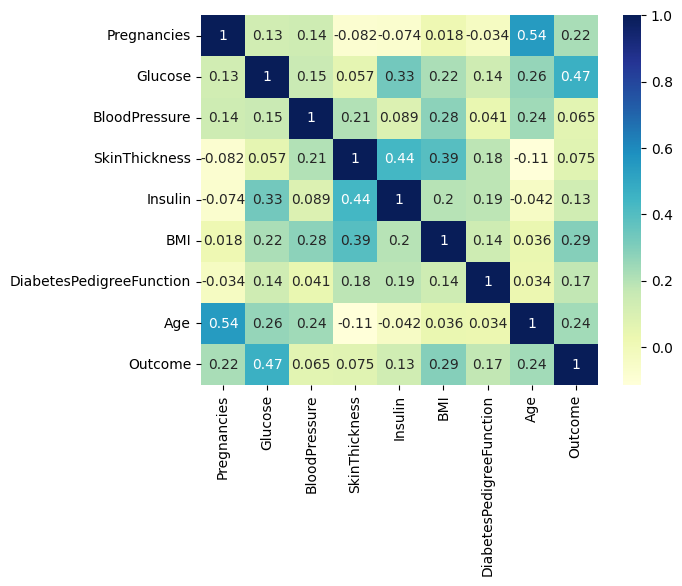

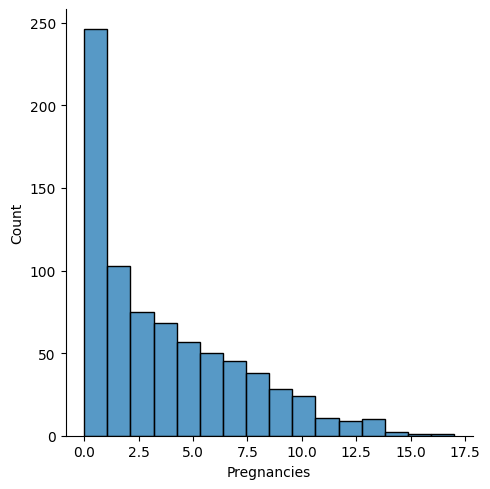

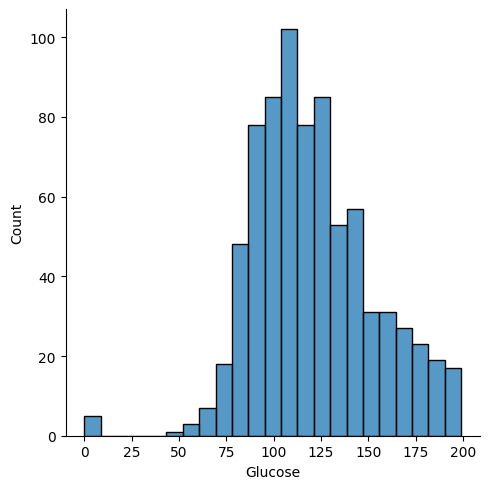

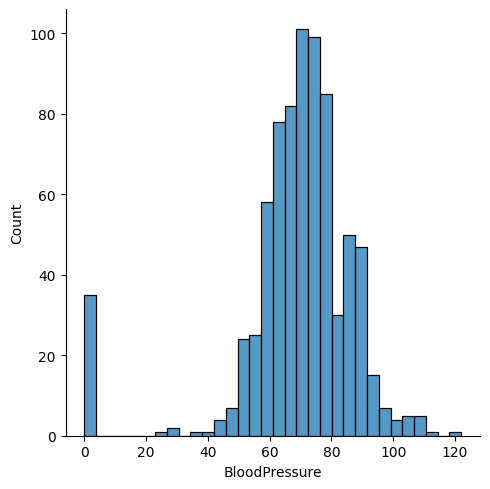

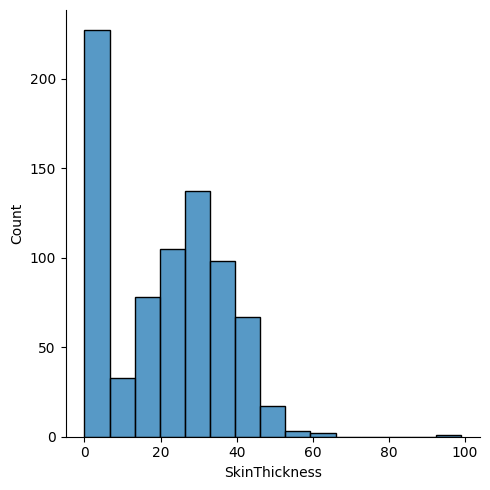

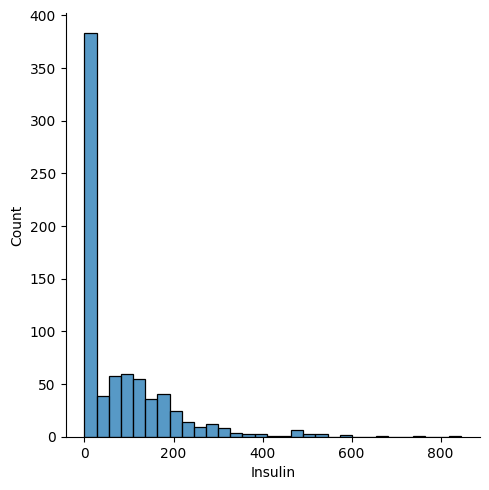

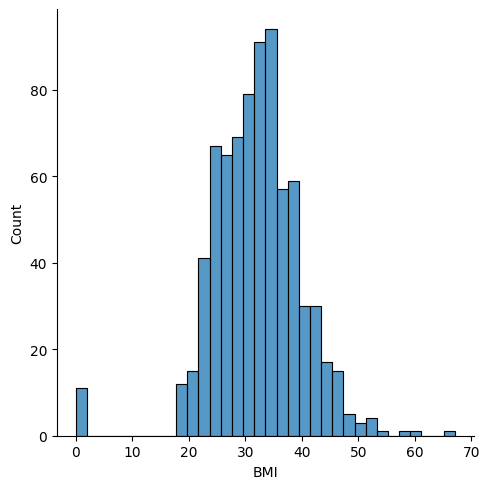

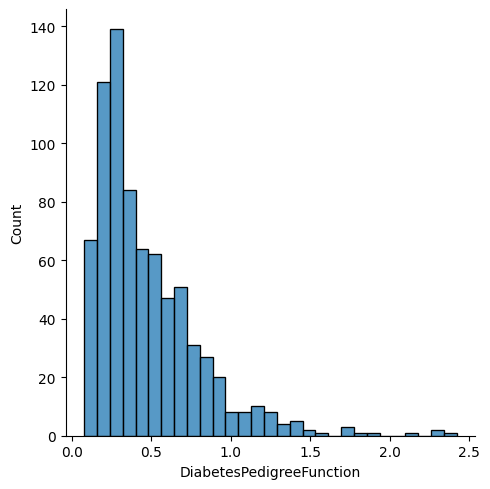

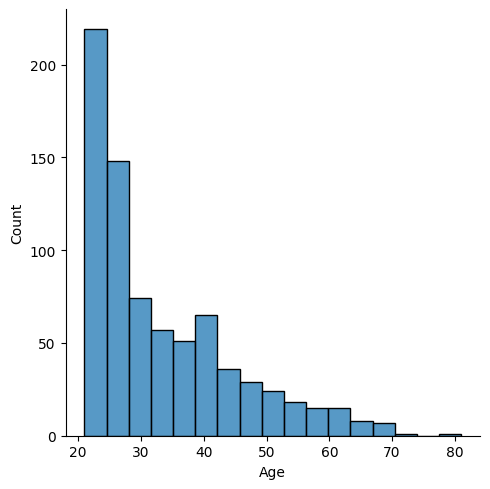

In [211]:
# data plotting and distributions
import seaborn as sns
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

sns.displot(data["Pregnancies"]) 
sns.displot(data["Glucose"])
sns.displot(data["BloodPressure"])
sns.displot(data["SkinThickness"])
sns.displot(data["Insulin"])
sns.displot(data["BMI"])
sns.displot(data["DiabetesPedigreeFunction"])
sns.displot(data["Age"])

Adjusting missing data

    - To handle missing data and outliers, we'll replace missing values with NaN and use KNNImputer for imputation. KNNImputer wroks by finding the k nearest neighbors to each missing value and imputes it with the average of their values. This ensures a more representative imputed value. By the heatmap we discoverd that bloodpressure, skinthickness, isluin and BMI has zero values that might affect the accuracy of the model with different levels. for example the bloodpressure does not have a big affect on the outcome so removing or keeping them will have no big diffrene on the model performance. I chose to replace all this zeros by the KNNImputer function. 


In [212]:
from sklearn.impute import KNNImputer

# Create an instance of the KNNImputer class with k=5 (the default)
imputer = KNNImputer()

features["Glucose"].replace(0, np.nan, inplace=True)
features["Glucose"] = imputer.fit_transform(features[["Glucose"]])

# Replace zeros with NaNs so they can be imputed
features["BloodPressure"].replace(0, np.nan, inplace=True)
# Use KNNImputer to fill in the missing values
features["BloodPressure"] = imputer.fit_transform(features[["BloodPressure"]])

features["SkinThickness"].replace(0, np.nan, inplace=True)
features["SkinThickness"] = imputer.fit_transform(features[["SkinThickness"]])

features["Insulin"].replace(0, np.nan, inplace=True)
features["Insulin"] = imputer.fit_transform(features[["Insulin"]])

features["BMI"].replace(0, np.nan, inplace=True)
features["BMI"] = imputer.fit_transform(features[["BMI"]])

Undersampling 

    - We create an instance of the randomundersampler class whih is used in an imbalanced dataset, the function specifies the desired ratio of minority to majority class samples in the output data. In this case, the ratio is set to "not minority", which means that the majority class will be undersampled to the point where the number of samples in the majority class will be equal to the number of samples in the minority class.

In [213]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy="not minority")
X_res, y_res = rus.fit_resample(features, target)

Converting the target dataframe into numpy array

In [214]:
# reformatting
target = np.array(target)

Representing the number of features that the dataset contain 

In [215]:
# shape of the data
features.shape

(768, 8)

Splitting the dataset

    - train_test_split: randomoly spilt the dataset into a taining set and a test set, the 
    
    - mean_squared_error: compute the mean squared error between the true target values and the predict ones. 

    - The test_size parameter is set to 0.3, splits the dataset into 70% training and 30% for testing. if we had a higher split percenatge for example 90% training and 10% testig that might lead to overfitting the model which means that the model  becomes too complex and starts to memorize the training data instead of learning general patterns from it. This leads to poor performance on new, unseen data. The random_state is just a random number that split the data to make sure that it is the same split is the same everytime 

In [216]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3,random_state=109) 

Support Vector Machine (SVM)

    - This code is creating a SVM classifier pipeline, tuning its hyperparameters using GridSearchCV, and evaluating its performance on a test set.

    - The SVM classifer is created using the svm.SCV function, and a pipeline line been created to standardize the data using the standscaler() before tarining the classifer. 

    - The regularisation parameter C, the type of kernel (linear or rbf) and the coef0 value for the rbf kernel are all specified in the the dictionary of hyperparameters for the SVM classifier. GridSearchCV will be used to optimise these hyperparameters. I tried implementing the poly kernel with them but the scores accuracy and recall of the poly kernel is less than them and it also make the processing time a lot longer because of the degree hyperparameter takes a bit of time to scale the data in different degress. 

    - GridSearchCV with the svm classifer pipeline and the hyperparameters dictionary, performs 5-fold cross-validation on the training data to optimise the hyperparameters, and then outputs the best hyperparameters and corresponding the nest hyperparameter cross-validation score using the grid_search.best_params_ and grid_search.cv_results_['mean_test_score'].mean()

    - The y_pred variable is used  to get the best-performing SVM classifier with optimized hyperparameters. This best estimator is then used to predict the class labels for the test data.

    - Cross-validation is a statistical method used to evaluate a model's performance by dividing the dataset into multiple subsets, training the model on some subsets, and testing it on the remaining subsets

    - Confusion matrix to compute it for the predicitions made by the SVM classifier 
    
    - classification report to prest a summary of the classifer performance, such as accuracy, precision, recall, and F1 score.
    
    


In [217]:
# Import libraries
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

# Create an SVM Classifier pipeline
clf = svm.SVC(kernel='linear')
pipeline = make_pipeline(StandardScaler(), clf)

# Define hyperparameter grid
param_grid = {'svc__C': [0.1, 1, 10, 100],
              'svc__kernel': ['linear', 'rbf'],
              'svc__degree': [2, 3, 4, 5],
              'svc__coef0': [0, 1, 5, 10]}

# Create a GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding cross-validation score
print("Best hyperparameters: ", grid_search.best_params_)
#print("Best cross-validation score: ", grid_search.best_score_)
print("Mean cross-validation score: ", grid_search.cv_results_['mean_test_score'].mean())

# Predict the class labels for the test data using the best estimator
y_pred = grid_search.best_estimator_.predict(X_test)

# Calculate confusion matrix and classification report
confusion = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix')
print(confusion)
tp, fp, fn, tn = confusion.ravel()
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"False negatives: {fn}")
print(f"True negatives: {tn}")

print('\nClassification Report\n')
print(classification_report(y_test, y_pred))

import warnings
warnings.filterwarnings('ignore')



Best hyperparameters:  {'svc__C': 0.1, 'svc__coef0': 0, 'svc__degree': 2, 'svc__kernel': 'linear'}
Mean cross-validation score:  0.7290000000000001

Confusion Matrix
[[65 21]
 [20 55]]
True positives: 65
False positives: 21
False negatives: 20
True negatives: 55

Classification Report

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        86
           1       0.72      0.73      0.73        75

    accuracy                           0.75       161
   macro avg       0.74      0.74      0.74       161
weighted avg       0.75      0.75      0.75       161



Getting the error brtween the actual test and the predicted targets for the svm model

In [218]:
from sklearn import metrics
# squared error
print("error:", mean_squared_error(y_test, y_pred))


error: 0.2546583850931677


Ensemble Model

    - Importing the ensemble model: RandomForestRegressor

    - pipeline line been created to standardize the data using the standscaler() before tarining the RandomForestRegressor. on the tarining dataset, to predict values and convert them into categorical data. It then calculates the confusion matrix, classification report as mean squared error as measures of the model's performance.
    
    - Imoprting the confusion matrix to compute it for the predicition made by the ensemble model
    
    - Imoprting the classification report to get a summary of the ensemble model performance 
    
    -  The mean squared error is a measure of the difference between the predicted and actual values



In [219]:

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report

# create the pipeline
e_pipeline = make_pipeline(StandardScaler(),RandomForestRegressor())

# fit the pipeline to the training data
e_pipeline.fit(X_train, y_train)

# make predictions on the validation dataset
e_pred = e_pipeline.predict(X_test)

# convert the predicted values to categorical data
e_pred_categorical = [1 if x >= 0.5 else 0 for x in e_pred]

# calculate the confusion matrix
confusion = confusion_matrix(y_test, e_pred_categorical)
print('\nConfusion Matrix')
print(confusion)

# calculate the classification report
class_report = classification_report(y_test, e_pred_categorical)
print('\nClassification Report\n')
print(class_report)

# calculate the mean squared error and R2 score
mse = mean_squared_error(y_test, e_pred)
print("Mean squared error: ", mse)




Confusion Matrix
[[65 21]
 [17 58]]

Classification Report

              precision    recall  f1-score   support

           0       0.79      0.76      0.77        86
           1       0.73      0.77      0.75        75

    accuracy                           0.76       161
   macro avg       0.76      0.76      0.76       161
weighted avg       0.77      0.76      0.76       161

Mean squared error:  0.166411801242236


Compare and contrast

    - Based on the performance of both models, The  SVM model and an ensemble model (Random Forest Regressor). The SVM model has an average accuracy score of 0.73, with average values of precision of 0.72 and a recall of 0.75. The ensemble model has an average accuracy score of 0.80, with average values of precision of 0.75 and a recall of 0.77.

    - It is difficult to make a definitive conclusion about which model is better because there is no big differnce between their vallues. Both models have relatively similar accuracy scores, and the precision and recall values are also similar.

    - The Svm model can handle high-dimensial data wehre the number of features is large compared to sample. Through fine-tuning the hyperparameters, such as the C parameter, which regulates the trade-off between margin size and classification mistakes. SVMs give users more control over the model. This adjusting may result in a more precise model. Through the use of kernel functions like the RBF kernel, SVMs are able to handle connections between the input and output factors that are not linear. Even though RFRs can handle non-linear connections, but it might need more tress to reach a good fit.
 
    - The ensemble model Random Forest Regressor can handle non-linear and high-dimensional data. However, they can do so more efficiently and effectively, especially when the number of features is very large. RFRs are robust to outliers and noisy data. They achieve this by building multiple trees, each of which focuses on a different subset of the data, and then combining their predictions. This makes them less sensitive to individual data points that may be outliers or noise. Data normalisation is necessary for SVM performance. They are sensitive to the size of the input characteristics, which explains this. RFRs, on the other hand, are insensitive to the size of the input characteristics and do not require data normalisation.
